## 1. Bell - Round 1

Document code using comments, so we can all understand the code easily:

In [1]:
# Describe every piece of code with comments

### 1.1 Import dependencies for this notebook

In [3]:
import pandas as pd
import json

### 1.2 Analysis

In [9]:
# Store train set in pandas dataframe
train = pd.DataFrame.from_records(json.load(open('../data/train.json')))
test = pd.DataFrame.from_records(json.load(open('../data/test.json')))

# Print first 5 rows
train.head()

,ENTRYTYPE,title,editor,publisher,author,abstract
0,inproceedings,Learning to lemmatise Polish noun phrases,None,Association for Computational Linguistics,"[Radziszewski, Adam]",None
1,inproceedings,The Treebanked Conspiracy. Actors and Actions ...,None,None,"[Passarotti, Marco, González Saavedra, Berta]",None
2,inproceedings,Linguistic structure and machine translation,None,None,"[Lamb, Sydney M.]",If one understands the nature of linguistic st...
3,inproceedings,NSEmo at EmoInt-2017: An Ensemble to Predict E...,None,Association for Computational Linguistics,"[Madisetty, Sreekanth, Desarkar, Maunendra San...","In this paper, we describe a method to predict..."
4,inproceedings,Explaining data using causal Bayesian networks,None,Association for Computational Linguistics,"[Sevilla, Jaime]",I introduce Causal Bayesian Networks as a form...


In [12]:
#define the missing data 
missing_values_train = train.isnull().sum()
print(missing_values_train)
print("--------------------------------")
missing_values_test = test.isnull().sum()
print(missing_values_test)

ENTRYTYPE        0
title            0
editor       64438
year             0
publisher     8201
author        2399
abstract     33531
dtype: int64
--------------------------------
ENTRYTYPE        0
title            0
editor       21479
publisher     2813
author         831
abstract     11278
dtype: int64


In [13]:
#missing value percentage 
missing_train_mean = train.isnull().mean()*100
print(missing_train_mean)
print("--------------------------------")
missing_test_mean = test.isnull().mean()*100
print(missing_test_mean)

ENTRYTYPE     0.000000
title         0.000000
editor       97.760719
year          0.000000
publisher    12.441970
author        3.639591
abstract     50.870832
dtype: float64
--------------------------------
ENTRYTYPE     0.000000
title         0.000000
editor       97.756235
publisher    12.802658
author        3.782086
abstract     51.328964
dtype: float64


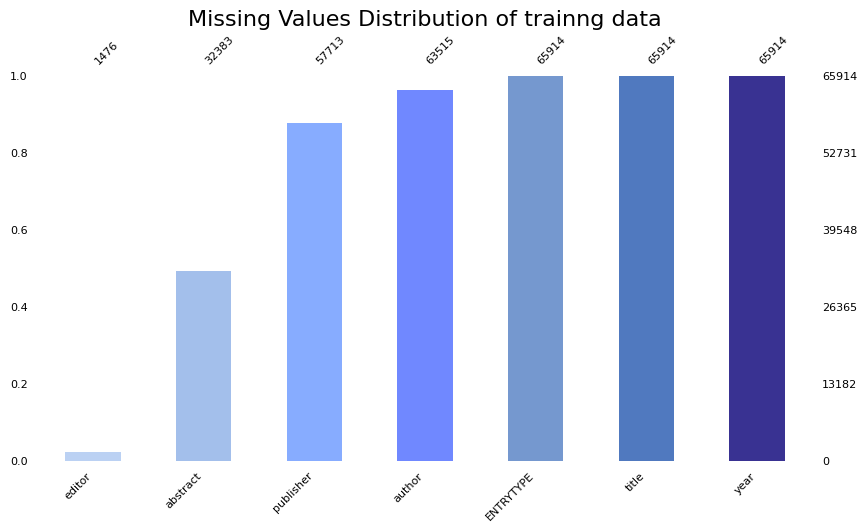

In [15]:

#for training data
import missingno as msno 
import matplotlib.pyplot as plt
color_palette = ['#bbd1f3', '#a3bfeb', '#87acff','#7088ff', "#7598cf","#5079bf", "#393292"]

# Customize the `msno.bar()` function to use the custom color palette
def custom_msno_bar(df):
    msno.bar(df, color=color_palette, sort="ascending", figsize=(10,5), fontsize=8)
    plt.title("Missing Values Distribution of trainng data", fontsize=16)

custom_msno_bar(train)
plt.show()    

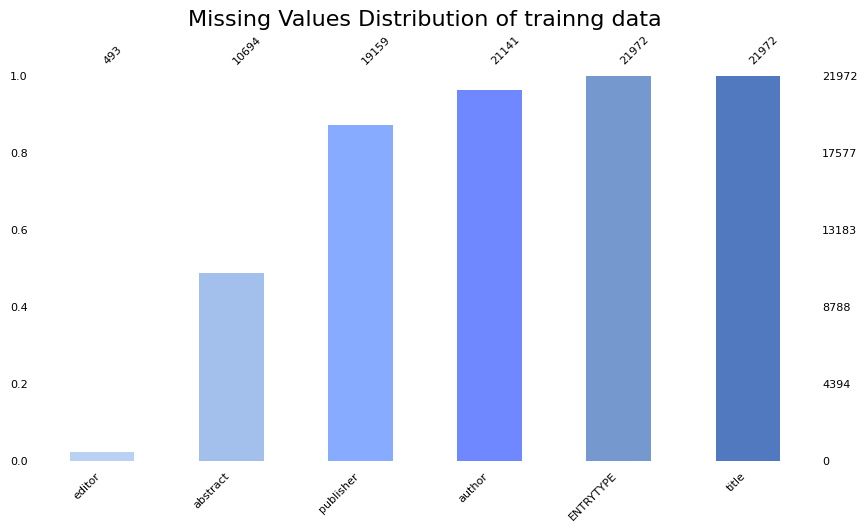

In [16]:
custom_msno_bar(test)
plt.show() 

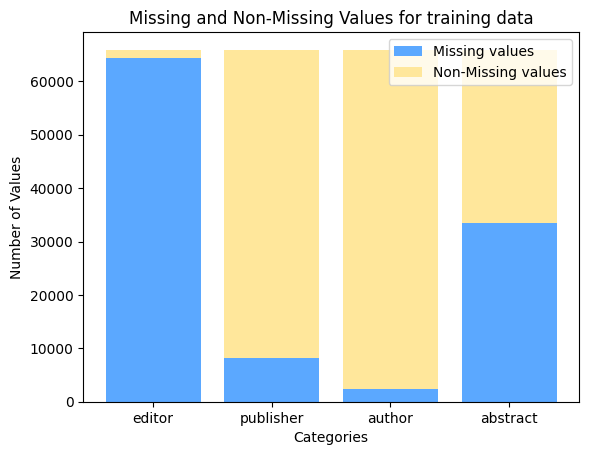

In [29]:
import matplotlib.pyplot as plt

#create categories to add each missing value column 
categories = ['editor', 'publisher', 'author', 'abstract']
missing_editor = train["editor"].isna().sum()
missing_publisher = train["publisher"].isna().sum()
missing_author = train["author"].isna().sum()
missing_abstract = train["abstract"].isna().sum()

# Count of non-missing values for each category
non_missing_editor = len(train) - missing_editor
non_missing_publisher = len(train) - missing_publisher
non_missing_author = len(train) - missing_author
non_missing_abstract = len(train) - missing_abstract

# Plotting the stacked bar chart
fig, ax = plt.subplots()

# Plotting the bars for missing values
ax.bar(categories, [missing_editor, missing_publisher, missing_author, missing_abstract], label='Missing values', color='#5ba8ff')

# Plotting the bars for non-missing values on top
ax.bar(categories, [non_missing_editor, non_missing_publisher, non_missing_author, non_missing_abstract], label='Non-Missing values', color='#ffe79b', bottom=[missing_editor, missing_publisher, missing_author, missing_abstract])

# Adding labels and title
ax.set_xlabel('Categories')
ax.set_ylabel('Number of Values')
ax.set_title('Missing and Non-Missing Values for training data')
ax.legend()

# Display the chart
plt.show()


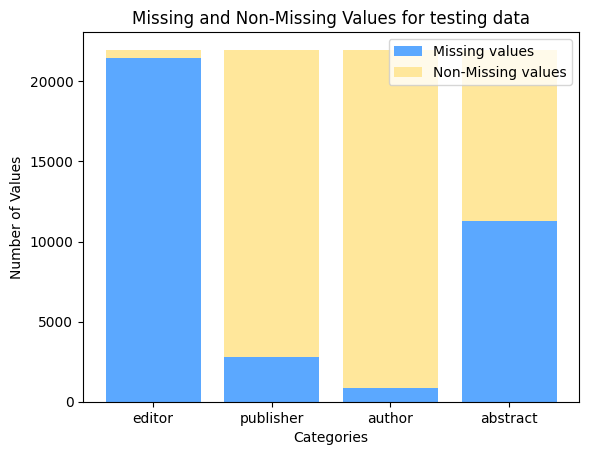

In [28]:
import matplotlib.pyplot as plt

#create categories to add each missing value column 
categories = ['editor', 'publisher', 'author', 'abstract']
missing_editor = test["editor"].isna().sum()
missing_publisher = test["publisher"].isna().sum()
missing_author = test["author"].isna().sum()
missing_abstract = test["abstract"].isna().sum()

# Count of non-missing values for each category
non_missing_editor = len(test) - missing_editor
non_missing_publisher = len(test) - missing_publisher
non_missing_author = len(test) - missing_author
non_missing_abstract = len(test) - missing_abstract

# Plotting the stacked bar chart
fig, ax = plt.subplots()

# Plotting the bars for missing values
ax.bar(categories, [missing_editor, missing_publisher, missing_author, missing_abstract], label='Missing values', color='#5ba8ff')

# Plotting the bars for non-missing values on top
ax.bar(categories, [non_missing_editor, non_missing_publisher, non_missing_author, non_missing_abstract], label='Non-Missing values', color='#ffe79b', bottom=[missing_editor, missing_publisher, missing_author, missing_abstract])

# Adding labels and title
ax.set_xlabel('Categories')
ax.set_ylabel('Number of Values')
ax.set_title('Missing and Non-Missing Values for testing data')
ax.legend()

# Display the chart
plt.show()


<Axes: >

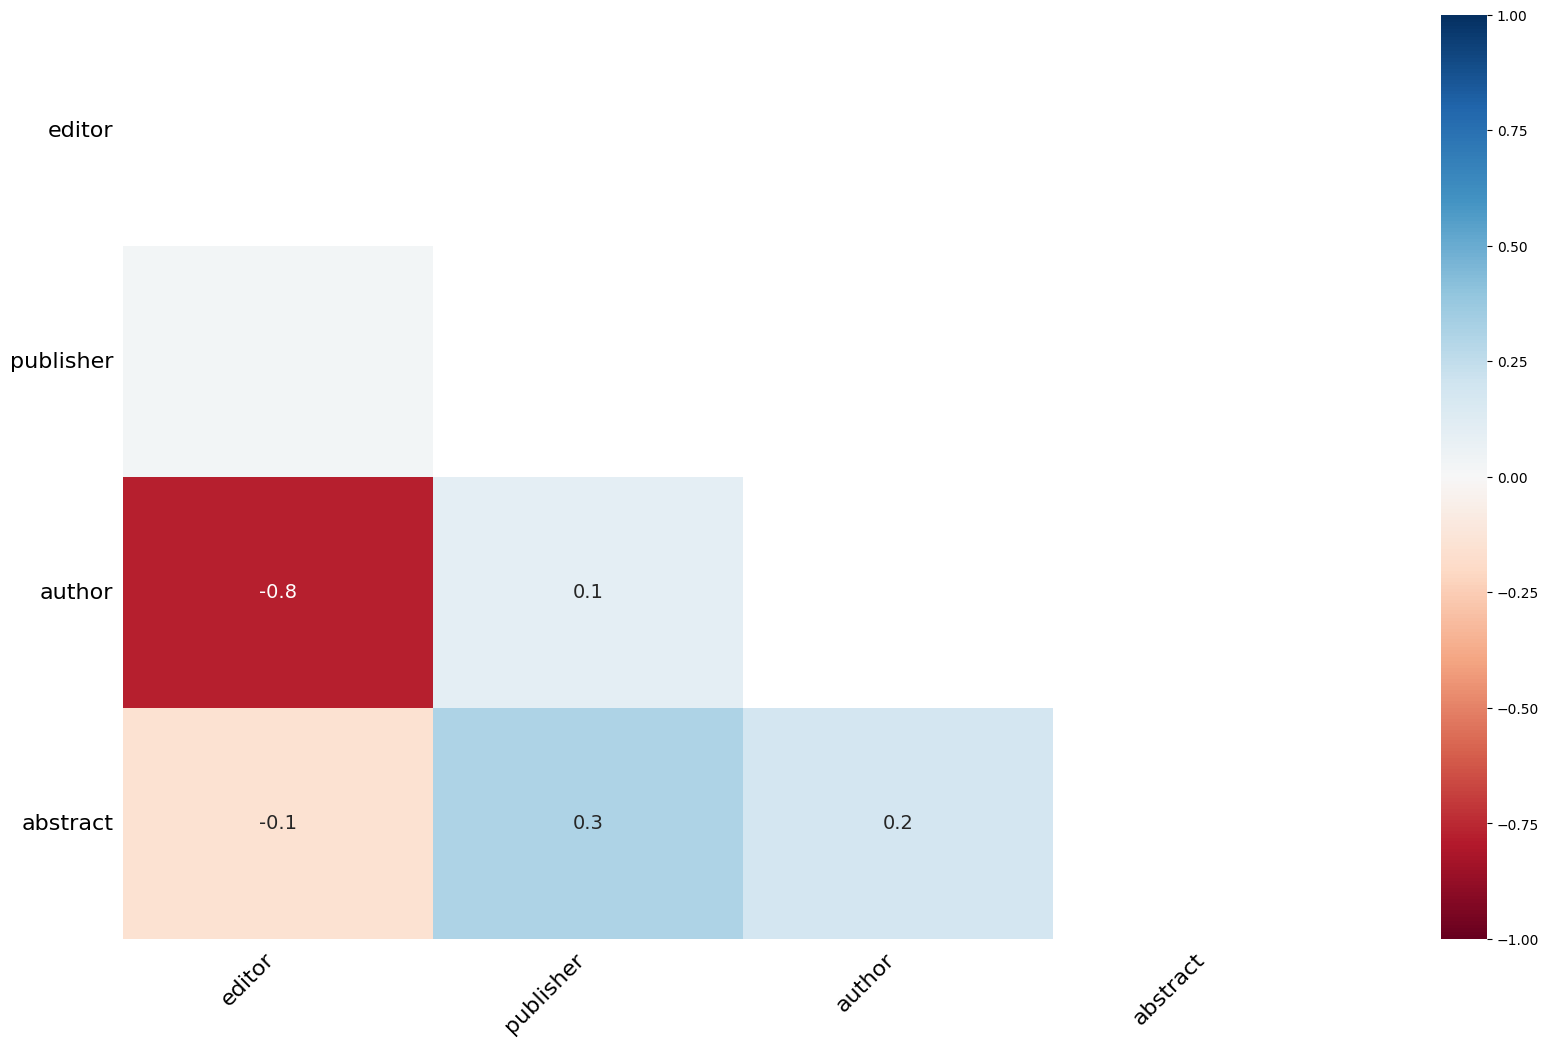

In [21]:
msno.heatmap(train)

<Axes: >

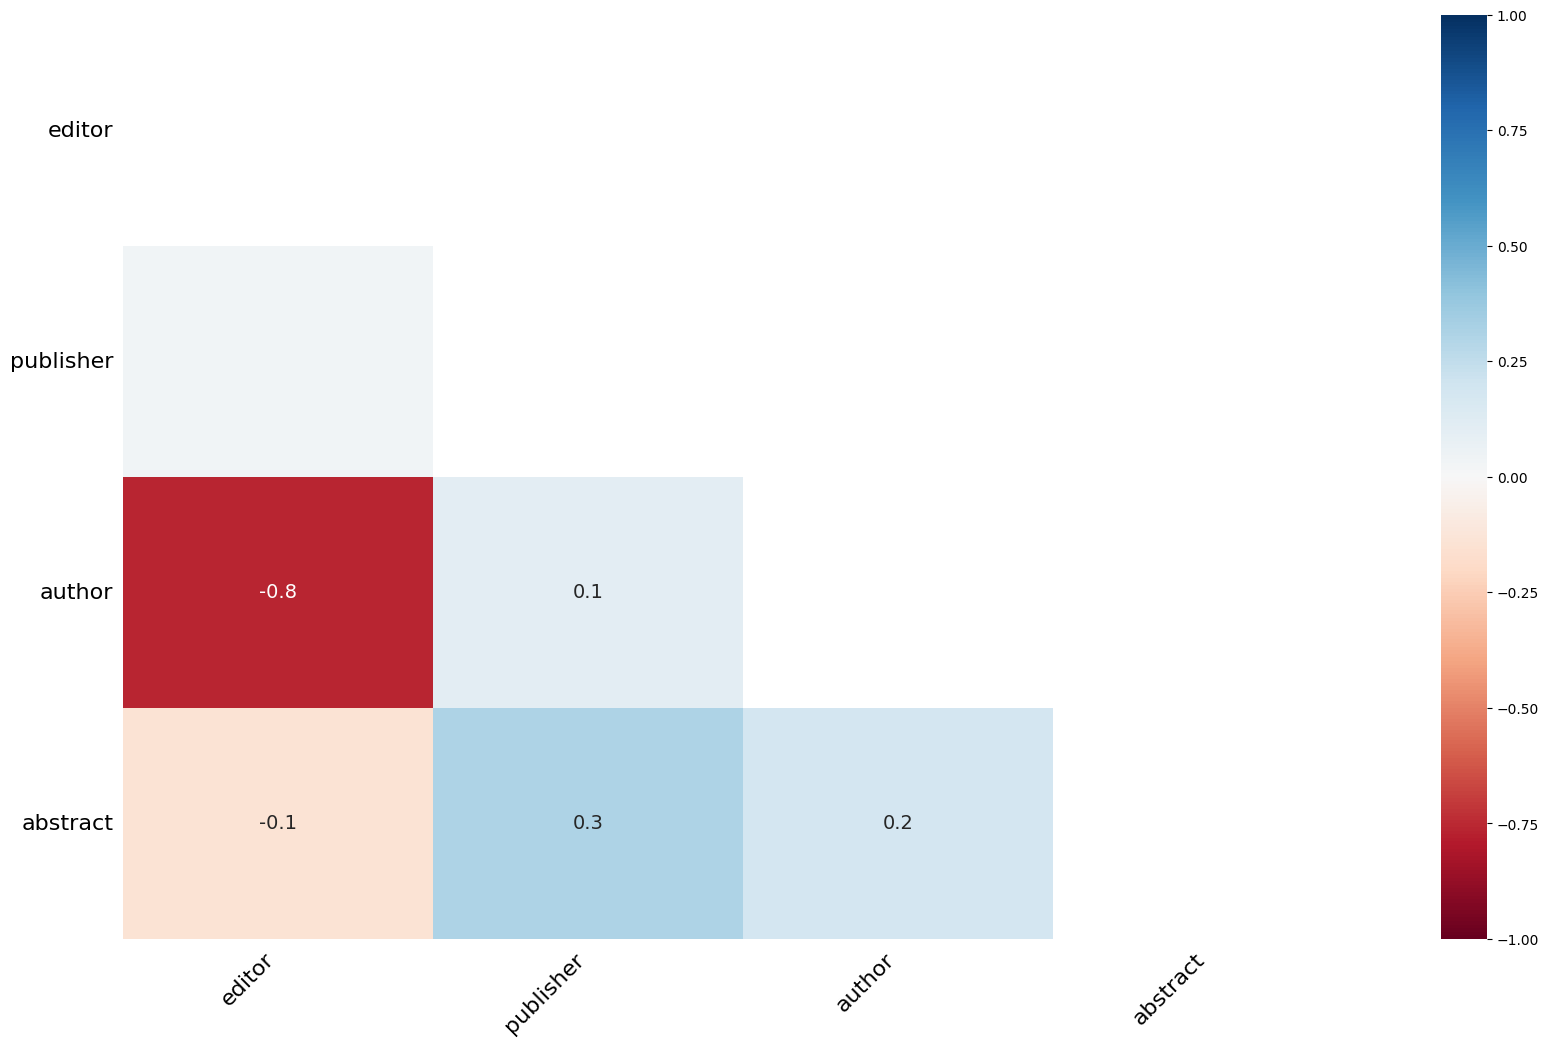

In [23]:
msno.heatmap(test)

<Axes: >

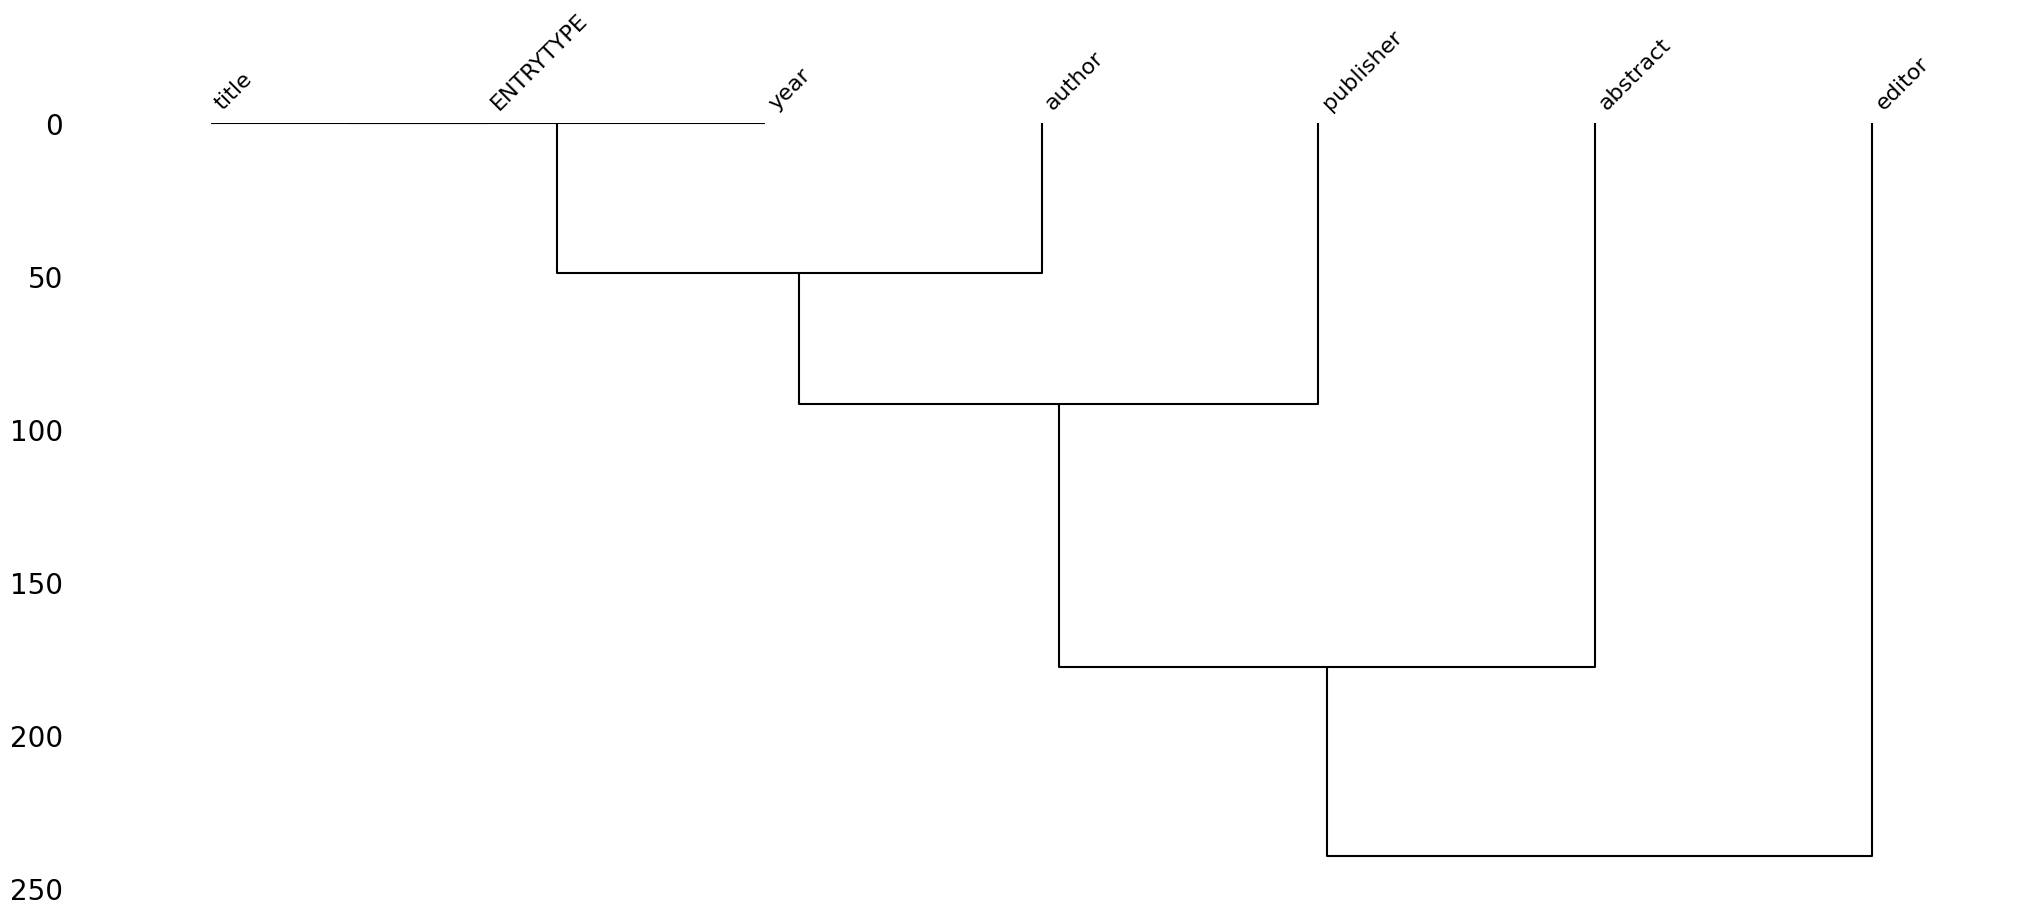

In [24]:
msno.dendrogram(train)

<Axes: >

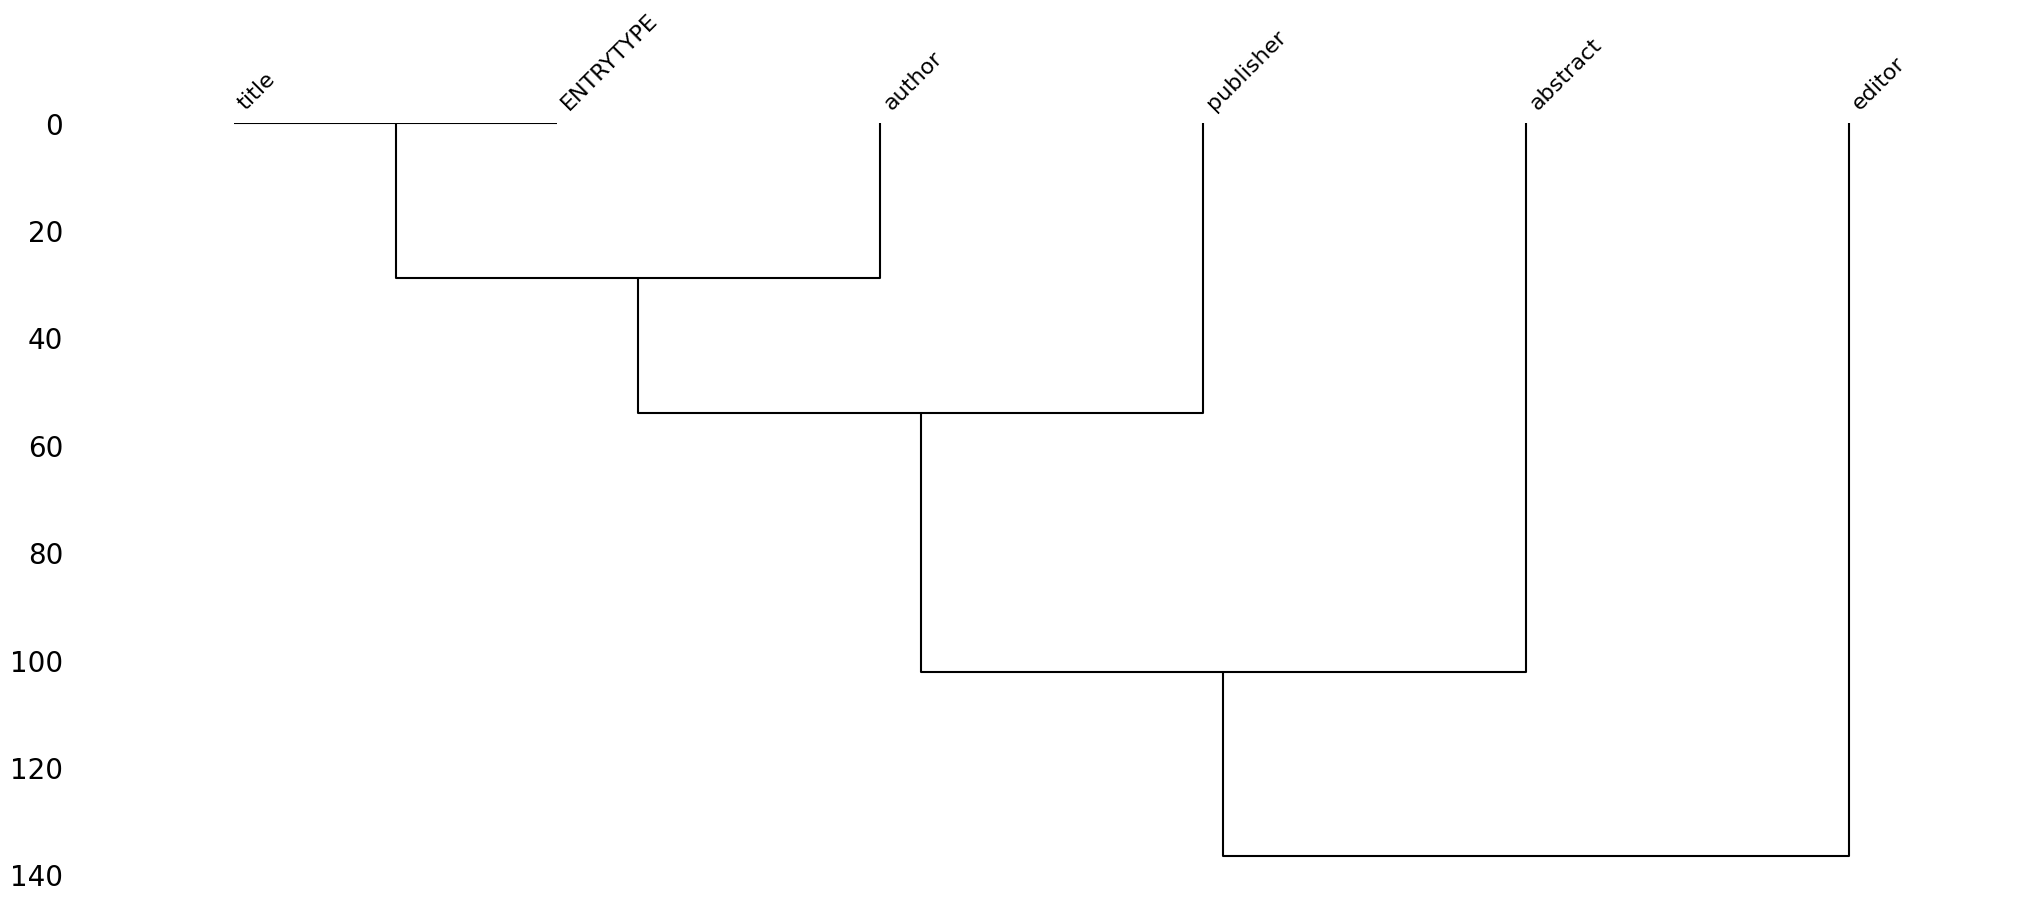

In [25]:
msno.dendrogram(test)

<Axes: >

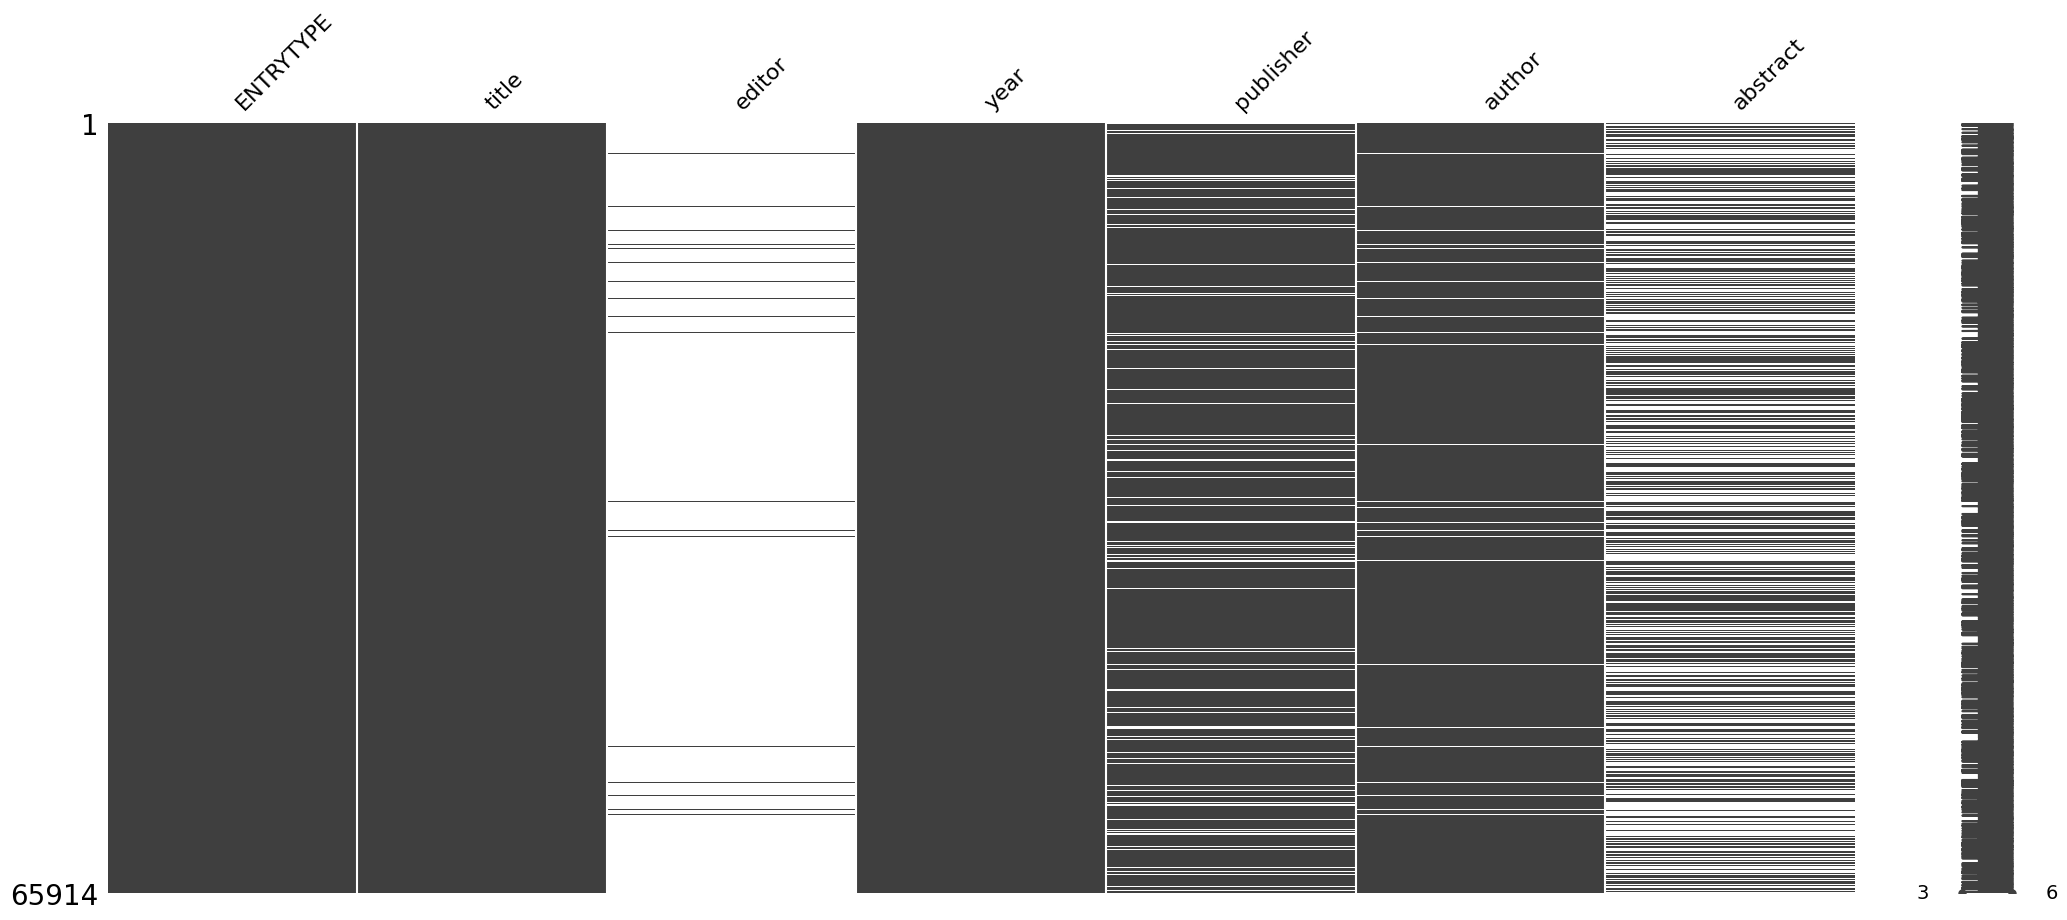

In [26]:
msno.matrix(train)

<Axes: >

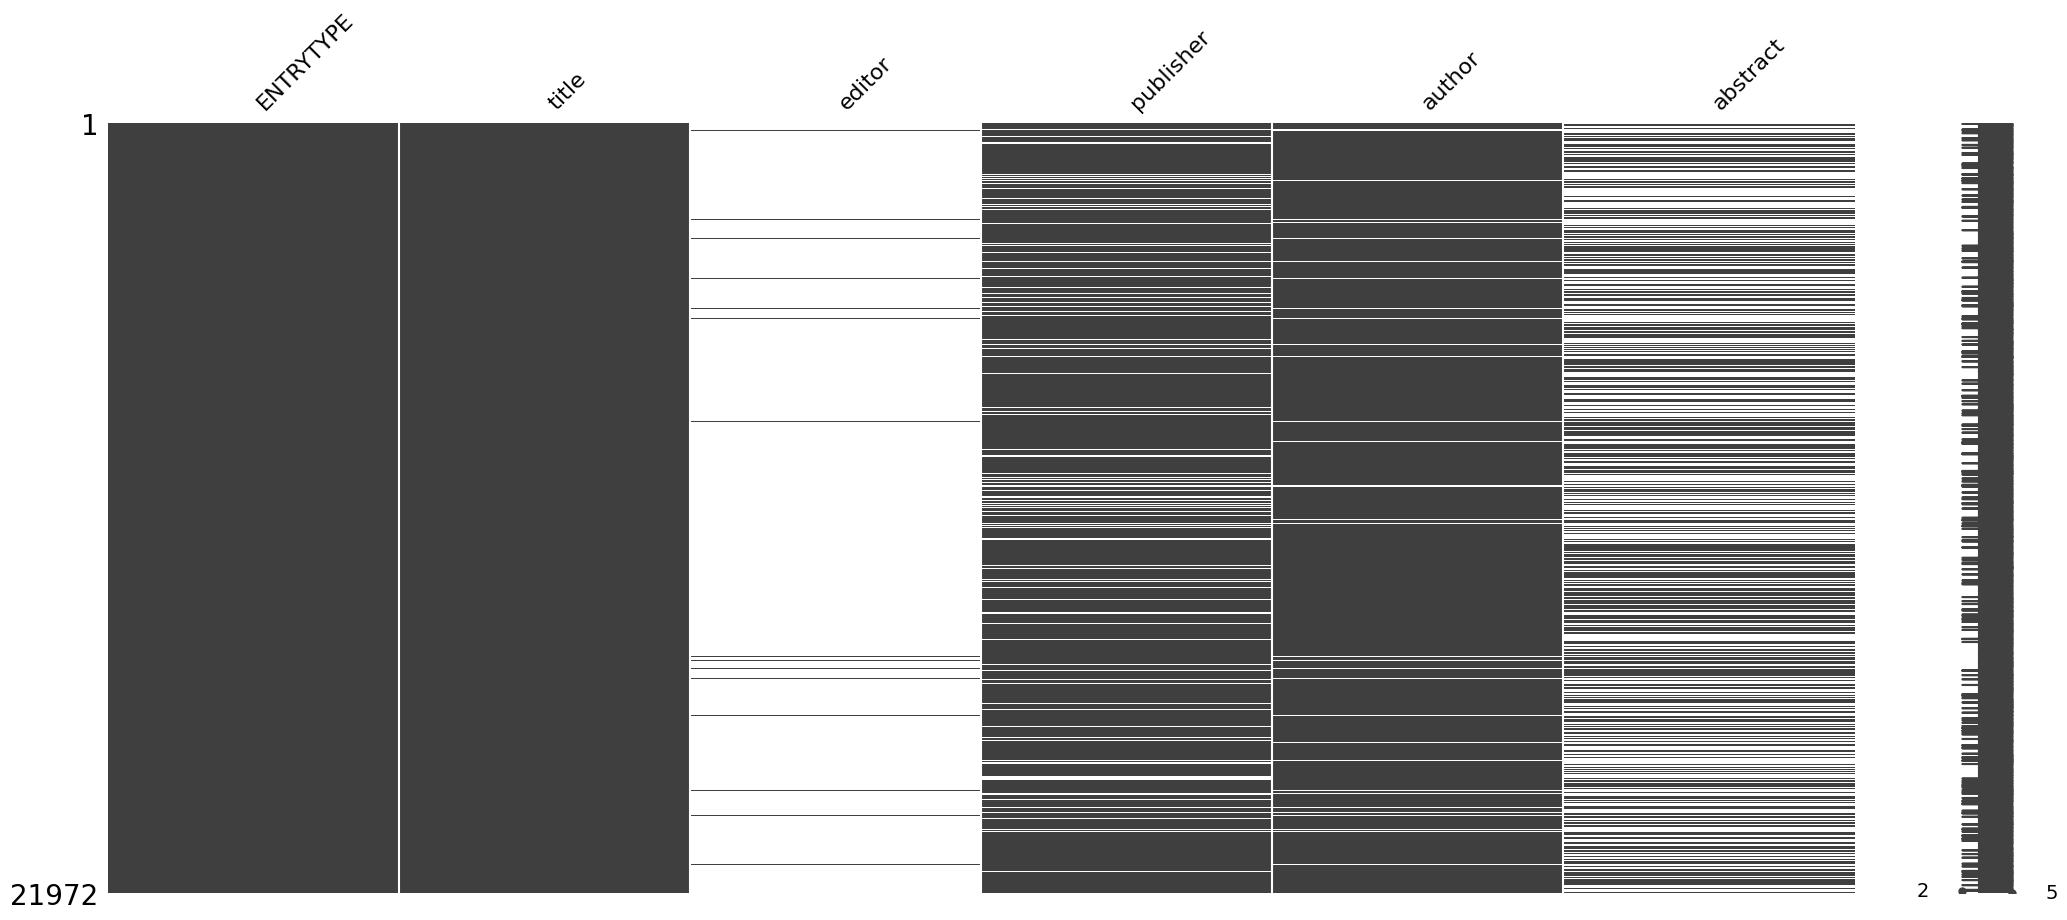

In [27]:
msno.matrix(test)